# PROYECTO IA - DETECCION DE PROBABILIDAD DE PARO CARDIACO

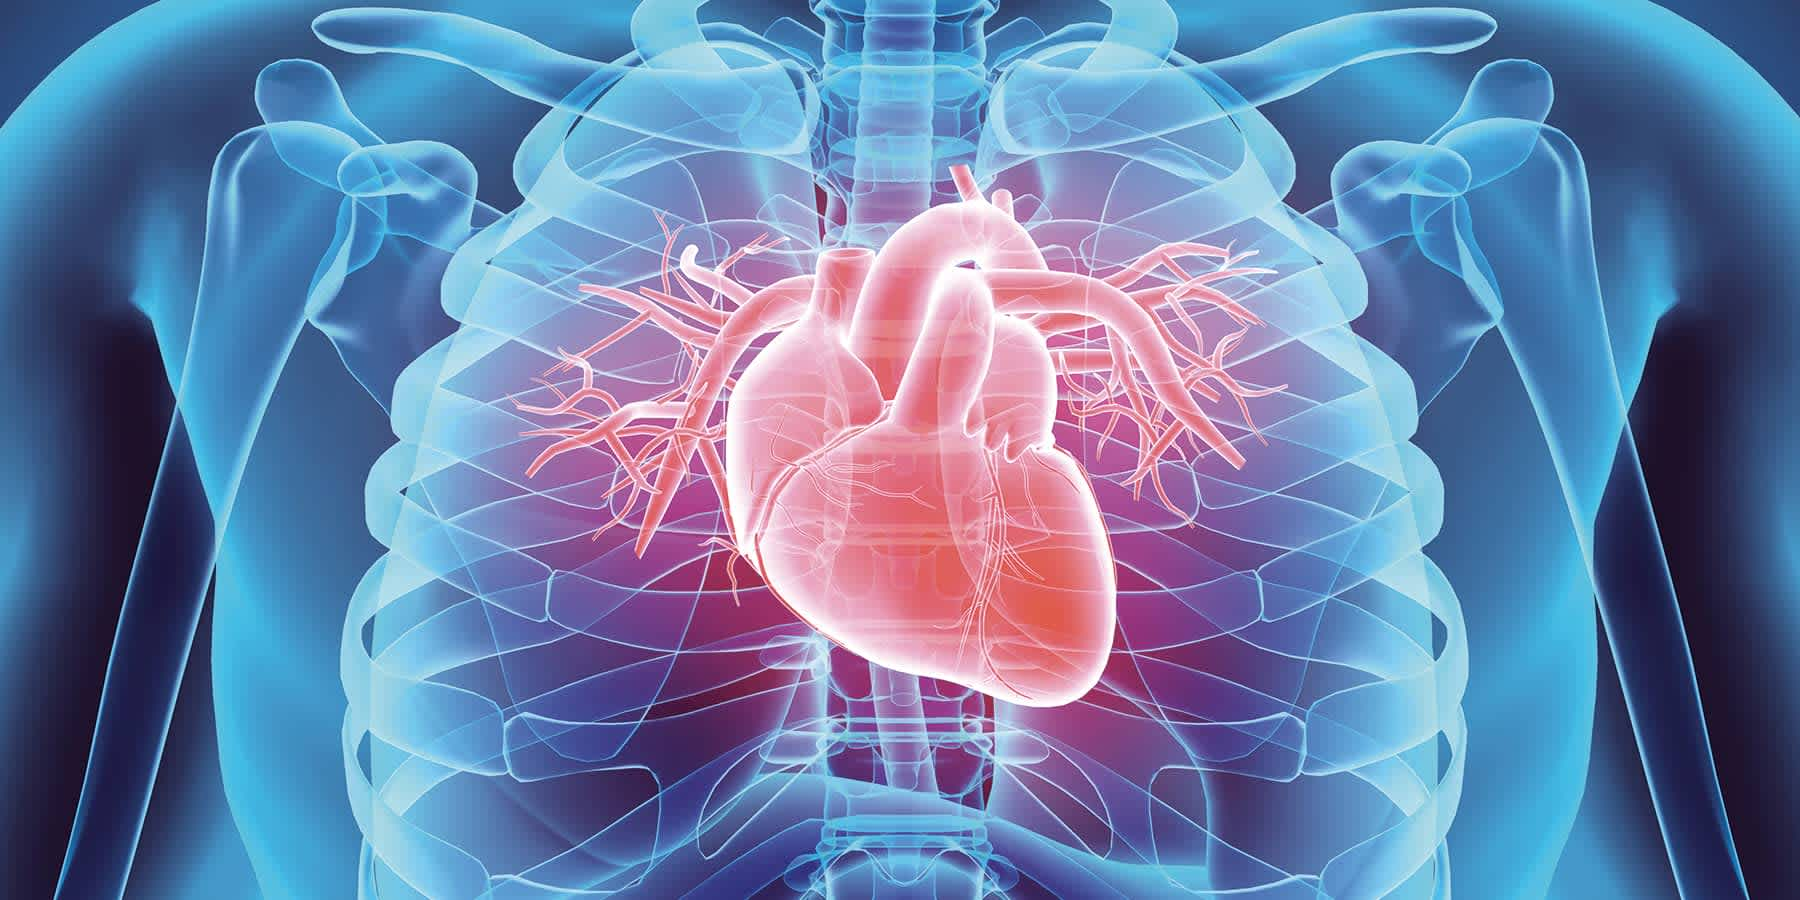

Las enfermedades cardiovasculares, como los ataques cardíacos, siguen siendo una de las principales causas de muerte en todo el mundo. A menudo, estos ataques cardíacos pueden ocurrir sin previo aviso, lo que hace que la prevención sea difícil. Sin embargo, gracias a los avances en la inteligencia artificial (IA), es posible desarrollar un modelo predictivo que pueda identificar a las personas con un alto riesgo de sufrir un ataque cardíaco.

Este proyecto de IA tiene como objetivo desarrollar un modelo predictivo de ataques cardíacos que pueda ser utilizado por los profesionales de la salud para identificar a los pacientes con un mayor riesgo de sufrir un ataque cardíaco. Para lograr esto, se utilizarán técnicas de aprendizaje automático para analizar grandes conjuntos de datos médicos y determinar los factores de riesgo más significativos.


In [50]:
#@title Imports
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings("ignore")

In [51]:
#@title Descargar el dataset
!gdown https://drive.google.com/uc?id=12zMVPA7CV0dbroDHFKtFRq2y0c63niy9


Downloading...
From: https://drive.google.com/uc?id=12zMVPA7CV0dbroDHFKtFRq2y0c63niy9
To: /content/heart.csv
100% 11.3k/11.3k [00:00<00:00, 30.8MB/s]


In [52]:
#@title Leer el dataset

dataset = pd.read_csv('/content/heart.csv', delimiter=',')
data_rows, data_cols = dataset.shape
print(f'There are {data_rows} rows and {data_cols} columns')
dataset.head(10)
dataset.info()

There are 303 rows and 14 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Información del DATASET

Age : Age of the patient in years

Sex : Sex of the patient (1 = male, 0 = female)

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 0 = asymptomatic)

trtbps : resting blood pressure (in mm Hg on admission to the hospital)

chol : serum cholestoral in mg/dl

fbs : fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

rest_ecg : restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

oldpeak : oldpeak - ST depression induced by exercise relative to rest

thalach : maximum heart rate achieved

slp :  the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

caa :  number of major vessels (0-3) colored by flourosopy

thal : 2 = normal; 1 = fixed defect; 3 = reversable defect

target : 0= less chance of heart attack 1= more chance of heart attack



In [53]:
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [54]:
dataset.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

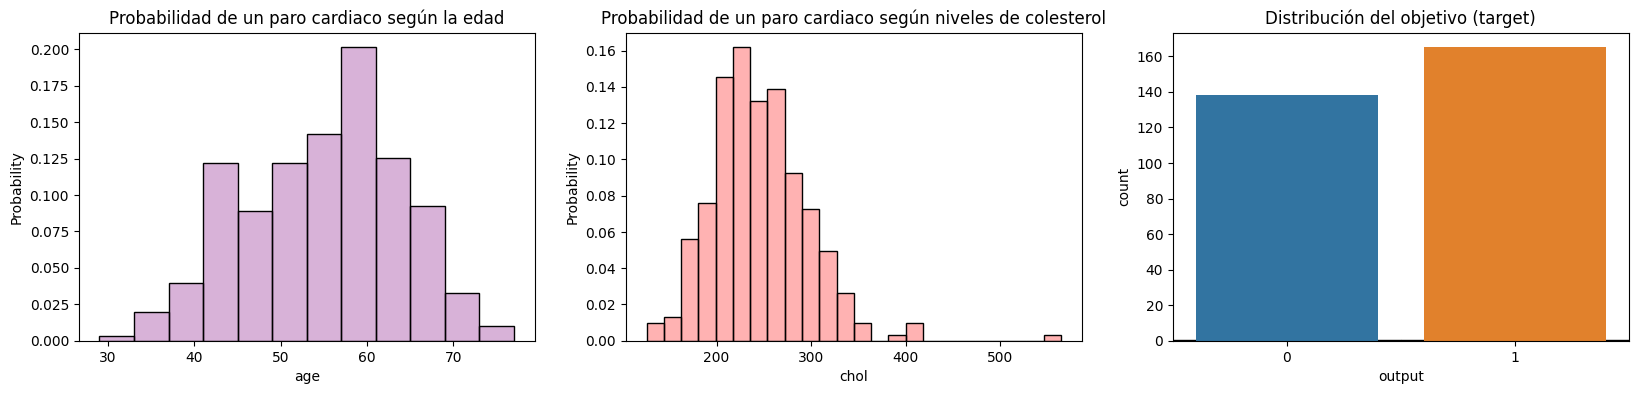

In [56]:
stat="probability"#@title Analisis grafico

plt.figure(figsize=(20,4))
plt.subplot(1,3, 1)
plt.title('Probabilidad de un paro cardiaco según la edad')
sns.histplot(data = dataset, x = "age", stat="probability", color="purple", alpha=0.3)

plt.subplot(1,3,2)
plt.title('Probabilidad de un paro cardiaco según niveles de colesterol')
sns.histplot(data = dataset, x = "chol", stat="probability", color="red", alpha=0.3)

plt.subplot(1,3,3)
dataset['sex'].replace(to_replace=1, value="Masculino", inplace=True)
dataset['sex'].replace(to_replace=0, value="Femenino", inplace=True)
plt.title('Probabilidad de un paro cardiaco según el sexo')
sns.histplot(data = dataset, x = "sex", stat="probability", color="green", alpha=0.3)

sns.countplot(x="output", data=dataset)
plt.title('Distribución del objetivo (target)')
plt.show()





*  En el primer histograma se puede a apreciar que hay una baja probabilidad de sufrir un ataque cardiaco entre los 0 y 30 años. Adémas hay una mayor
probabilidad de sufrir una ataque entre los 50 y 60 años.
*   En el segundo histograma se puede apreciar que hay una mayor probabilidad de sufrir un ataque cardiaco si se tienen altos niveles de colesterol en la sangre.

*   Por ultimo el histograma de color verde indica que el sexo masculino es mucho mas susceptible a sufrir un ataque cardiaco en comparación al sexo femenino.




<Axes: >

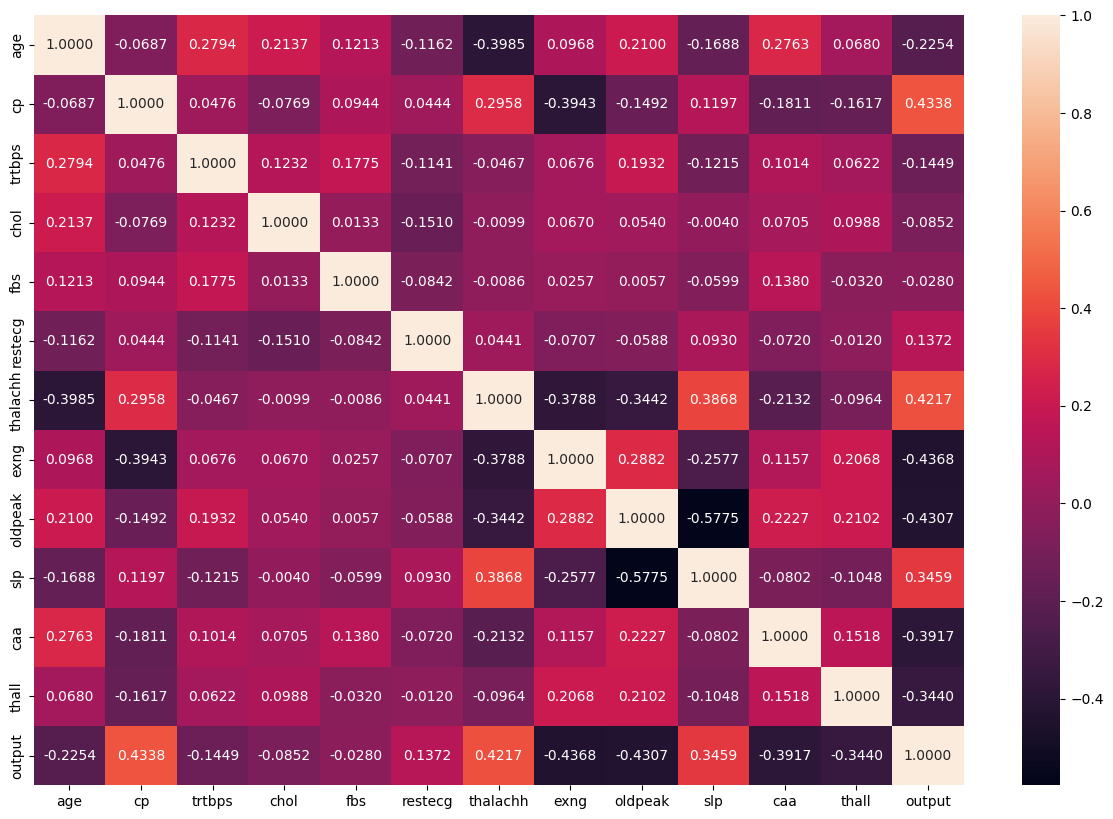

In [57]:
#@title **MATRIX DE CORRELACION**

plt.subplots(figsize=(15,10))
corr = dataset.corr()
sns.heatmap(corr, annot=True, fmt=".4f")

# Analísis de correlación
Una vez analizada la gráfica de correlación podemos extraer información sobre las variables de interes, en este caso las que tengan mayor correlación con la variable 'output' ya que es nuestra variable a estudiar.



*   **Variable thalachh** 'Maximum hearth rate achieved': Se puede observar del gráfico que la variable 'thalachh' es la que mayor correlación tiene con nuestra variable 'output'. Con un valor de correlación de 0.4217 positivo, lo cual nos indica que esta variable puede provocar un ataque cardiaco.

*   **Variable cp** 'Chest pain type': Esta es la variable que tiene mayor correlación con nuestra variable 'output' de interes con un valor de 0.4338 moderadamente fuerte.

*   **Variable spl** 'Slope' : La correlación entre las dos variables es 0.345877. En otras palabras, podemos decir que existe una correlación positiva moderadamente fuerte.






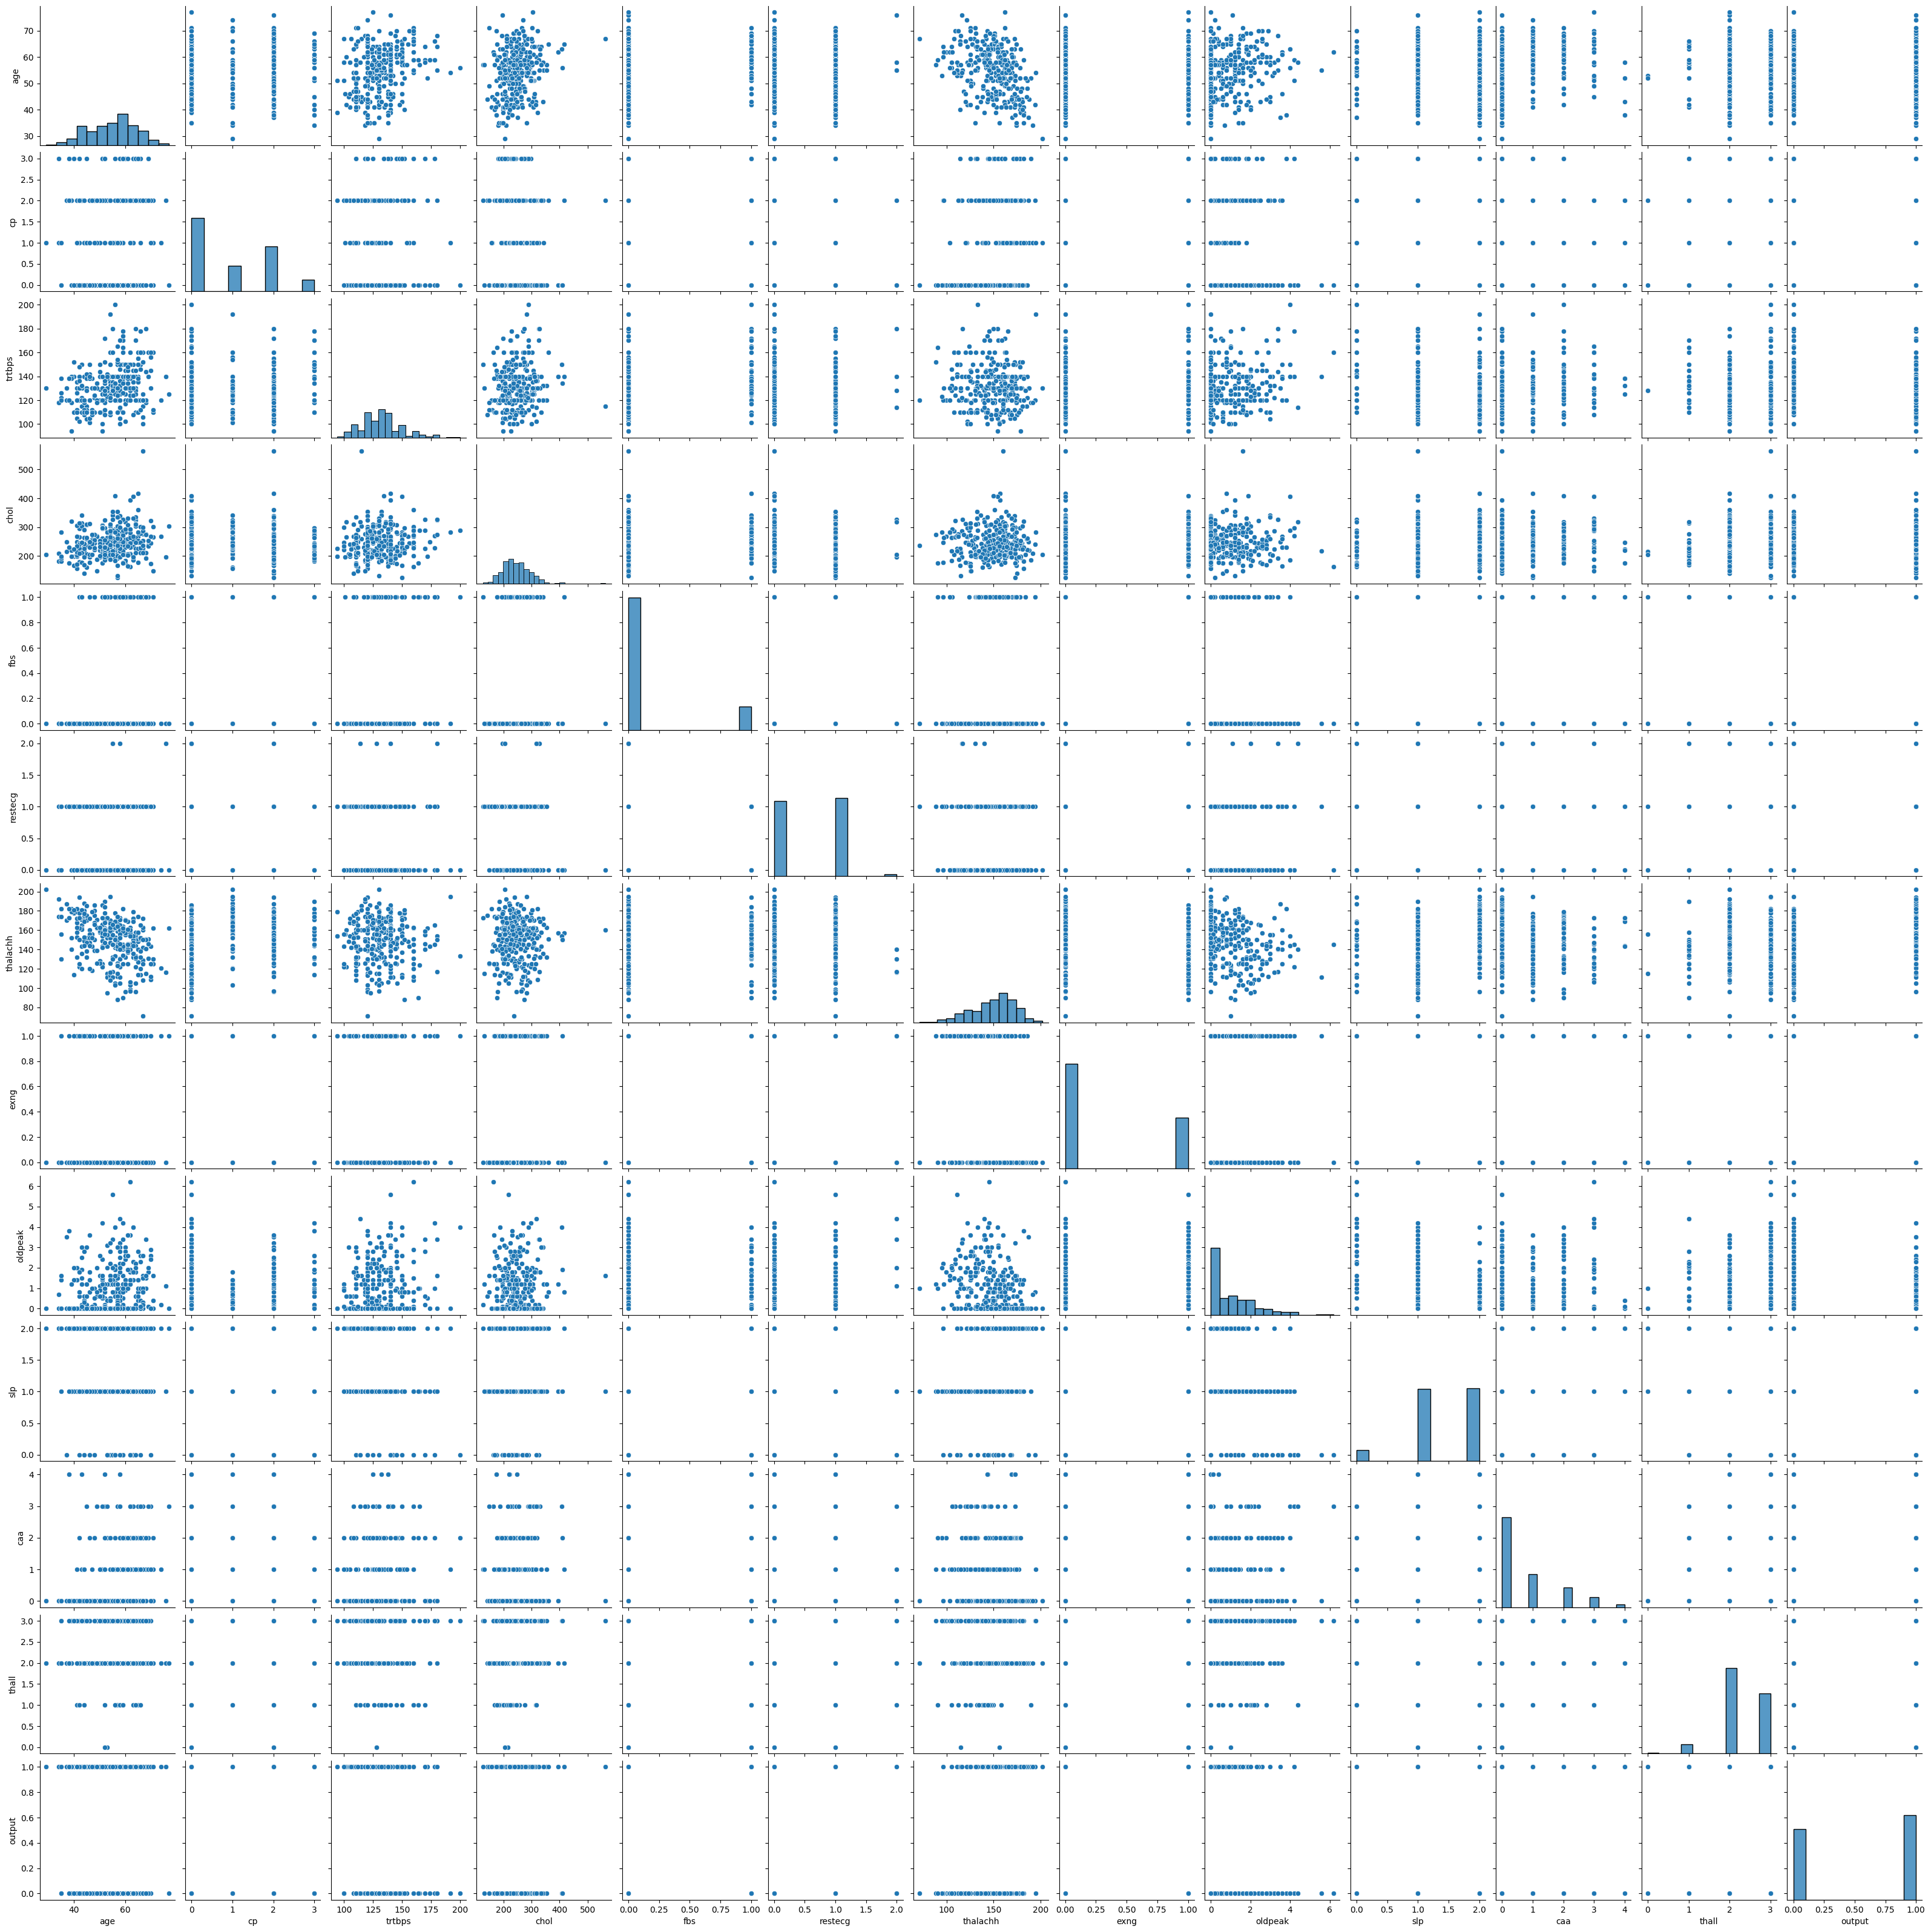

In [58]:
sns.pairplot(dataset, diag_kind="hist");# kind="kde"

#CONSTRUCCIÓN DEL MODELO
---



# Separación de los datos


In [59]:
#Se hace separación de las variables en categoricas y numericas

numeric_var = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall", "output"]

In [60]:
#Quitando datos con baja correlación
dataset.drop(["chol", "fbs", "restecg"], axis = 1, inplace = True)


In [61]:
categoric_var.remove("fbs")
categoric_var.remove("restecg")

In [62]:
dataset['sex'].replace(to_replace="Masculino", value=1, inplace=True)
dataset['sex'].replace(to_replace="Femenino", value=0, inplace=True)

dataset.head(5)

,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,150,0,2.3,0,0,1,1
1,37,1,2,130,187,0,3.5,0,0,2,1
2,41,0,1,130,172,0,1.4,2,0,2,1
3,56,1,1,120,178,0,0.8,2,0,2,1
4,57,0,0,120,163,1,0.6,2,0,2,1


# Aplicando One-Hot Encoding

Se aplicó la tecnica de one-hot encoding para trabajar mejor con los datos categoricos y mejorar el rendimiento de los modelos.

En el método de One-Hot Encoding, cada categoría de la variable categórica se convierte en una nueva columna binaria (binario) y se asigna un valor de 1 o 0 para indicar si la observación pertenece a esa categoría o no. Es decir, se crea una "bandera" para cada categoría.

La ventaja del One-Hot Encoding es que permite representar variables categóricas en una forma numérica que no impone ningún orden o jerarquía artificial entre las categorías. Además, permite a los modelos de aprendizaje automático utilizar eficientemente esta información sin asumir relaciones lineales entre las categorías.

In [63]:
dataset_copy = dataset.copy()
dataset_copy.head()

,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,150,0,2.3,0,0,1,1
1,37,1,2,130,187,0,3.5,0,0,2,1
2,41,0,1,130,172,0,1.4,2,0,2,1
3,56,1,1,120,178,0,0.8,2,0,2,1
4,57,0,0,120,163,1,0.6,2,0,2,1


In [64]:
dataset_copy = pd.get_dummies(dataset_copy, columns = categoric_var[:-1], drop_first = True)
dataset_copy.head(5)

,age,trtbps,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,150,2.3,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1,37,130,187,3.5,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,172,1.4,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,178,0.8,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0
4,57,120,163,0.6,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0


In [65]:
X = dataset_copy.drop(["output"], axis = 1)
y = dataset_copy[["output"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 21)

In [66]:
X_train.head()

,age,trtbps,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
281,52,128,156,1.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
262,53,123,95,2.0,1,0,0,0,1,1,0,0,1,0,0,0,0,1
60,71,110,130,0.0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
76,51,125,166,2.4,1,0,1,0,0,1,0,0,0,0,0,0,1,0
37,54,150,165,1.6,1,0,1,0,0,0,1,0,0,0,0,0,0,1


In [67]:
y_train.head()

,output
281,0
262,0
60,1
76,1
37,1


In [68]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 242
X_test: 61
y_train: 242
y_test: 61


# Metodos de clasificación

In [69]:
#@title Metodo Naive Gaussian Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

est_GaussianNB = GaussianNB()
est_GaussianNB.fit(X_train,y_train)
accuracy_GaussianNB=accuracy_score(y_test,est_GaussianNB.predict(X_test))

print("El accuracy score del metodo Naive Gaussian Bayes es:", accuracy_GaussianNB)

El accuracy score del metodo Naive Gaussian Bayes es: 0.8360655737704918




*   Cross validation



In [70]:
#@title Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

CrossGaussianNB = cross_val_score(est_GaussianNB, X, y, cv=KFold(4, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy %.3f (+/- %.5f)"%(np.mean(CrossGaussianNB), np.std(CrossGaussianNB)))
CrossGaussianNB = np.mean(CrossGaussianNB)


accuracy 0.835 (+/- 0.01407)


In [71]:
#@title Metodo Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
est_RandomForestClassifier = RandomForestClassifier(random_state=21)
est_RandomForestClassifier.fit(X_train,y_train)
print("El accuracy score del metodo Random Forest es:", accuracy_score(y_test,est_RandomForestClassifier.predict(X_test)))

El accuracy score del metodo Random Forest es: 0.8032786885245902



*   Cross Validation




In [72]:
scores = cross_val_score(est_RandomForestClassifier, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7857142857142856


In [73]:
#@title Metodo Decision Tree Classifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

est_DecisionTreeClassifier = DecisionTreeClassifier(random_state=21)
est_DecisionTreeClassifier.fit(X_train,y_train)
print("El accuracy score del metodo Decision Tree es:", accuracy_score(y_test,est_DecisionTreeClassifier.predict(X_test)))

El accuracy score del metodo Decision Tree es: 0.7704918032786885



*   Cross Validation





In [74]:
scores = cross_val_score(est_DecisionTreeClassifier, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7047619047619047


In [75]:
#@title Metodo SVC Support Vector Machine
from sklearn.svm import SVC
est_SVC = SVC(random_state = 21)
est_SVC.fit(X_train, y_train)
accuracy_SVC=accuracy_score(y_test,est_SVC.predict(X_test))
print("El accuracy score del metodo SVC es:", accuracy_SVC)

El accuracy score del metodo SVC es: 0.6885245901639344



*   Cross Validation




In [76]:
scores = cross_val_score(est_SVC, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7047619047619047


#Tuning de parametros




##Tuning de parametros Decision Tree classifier


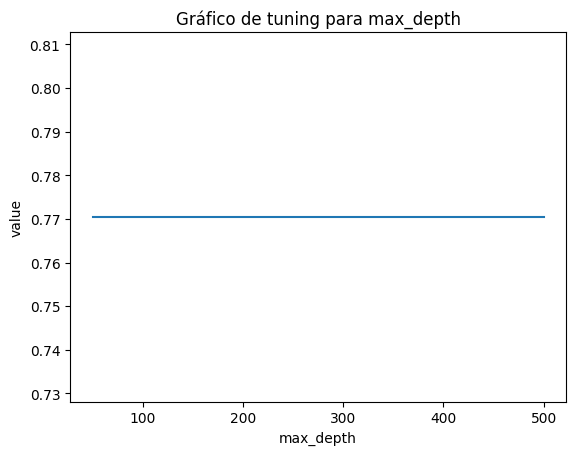

In [77]:
est_DecisionTreeClassifier = DecisionTreeClassifier(max_depth=50, random_state=21)
est_DecisionTreeClassifier.fit(X_train,y_train)
accuracy_DecisionTreeClassifier_1 = accuracy_score(est_DecisionTreeClassifier.predict(X_test), y_test)

est_DecisionTreeClassifier = DecisionTreeClassifier(max_depth=100, random_state=21)
est_DecisionTreeClassifier.fit(X_train,y_train)
accuracy_DecisionTreeClassifier_2 = accuracy_score(est_DecisionTreeClassifier.predict(X_test), y_test)

est_DecisionTreeClassifier = DecisionTreeClassifier(max_depth=150, random_state=21)
est_DecisionTreeClassifier.fit(X_train,y_train)
accuracy_DecisionTreeClassifier_3 = accuracy_score(est_DecisionTreeClassifier.predict(X_test), y_test)

est_DecisionTreeClassifier = DecisionTreeClassifier(max_depth=200, random_state=21)
est_DecisionTreeClassifier.fit(X_train,y_train)
accuracy_DecisionTreeClassifier_4 = accuracy_score(est_DecisionTreeClassifier.predict(X_test), y_test)

est_DecisionTreeClassifier = DecisionTreeClassifier(max_depth=300, random_state=21)
est_DecisionTreeClassifier.fit(X_train,y_train)
accuracy_DecisionTreeClassifier_5 = accuracy_score(est_DecisionTreeClassifier.predict(X_test), y_test)

est_DecisionTreeClassifier = DecisionTreeClassifier(max_depth=500, random_state=21)
est_DecisionTreeClassifier.fit(X_train,y_train)
accuracy_DecisionTreeClassifier_6 = accuracy_score(est_DecisionTreeClassifier.predict(X_test), y_test)

x = [50, 100, 150, 200, 300, 500]
y1 = [accuracy_DecisionTreeClassifier_1, accuracy_DecisionTreeClassifier_2, accuracy_DecisionTreeClassifier_3,accuracy_DecisionTreeClassifier_4,accuracy_DecisionTreeClassifier_5, accuracy_DecisionTreeClassifier_6 ]

plt.plot(x, y1)
plt.xlabel('max_depth')
plt.ylabel('value')
plt.title('Gráfico de tuning para max_depth')
plt.show()

Se aprecia un comportamiento lineal para el max depth, por lo tanto se tomara un valor intermedio de los valores probados. En este caso 200.

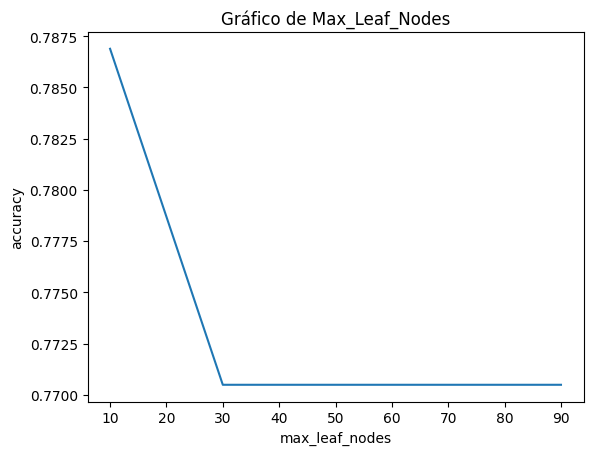

In [78]:
est_DecisionTreeClassifier = DecisionTreeClassifier(max_depth=150, max_leaf_nodes=10, random_state=21)
est_DecisionTreeClassifier.fit(X_train,y_train)
accuracy_DecisionTreeClassifier_1 = accuracy_score(est_DecisionTreeClassifier.predict(X_test), y_test)

est_DecisionTreeClassifier = DecisionTreeClassifier(max_depth=150, max_leaf_nodes=30, random_state=21)
est_DecisionTreeClassifier.fit(X_train,y_train)
accuracy_DecisionTreeClassifier_2 = accuracy_score(est_DecisionTreeClassifier.predict(X_test), y_test)

est_DecisionTreeClassifier = DecisionTreeClassifier(max_depth=150, max_leaf_nodes=50, random_state=21)
est_DecisionTreeClassifier.fit(X_train,y_train)
accuracy_DecisionTreeClassifier_3 = accuracy_score(est_DecisionTreeClassifier.predict(X_test), y_test)

est_DecisionTreeClassifier = DecisionTreeClassifier(max_depth=150, max_leaf_nodes=70, random_state=21)
est_DecisionTreeClassifier.fit(X_train,y_train)
accuracy_DecisionTreeClassifier_4 = accuracy_score(est_DecisionTreeClassifier.predict(X_test), y_test)

est_DecisionTreeClassifier = DecisionTreeClassifier(max_depth=150, max_leaf_nodes=90, random_state=21)
est_DecisionTreeClassifier.fit(X_train,y_train)
accuracy_DecisionTreeClassifier_5 = accuracy_score(est_DecisionTreeClassifier.predict(X_test), y_test)

x = [10, 30, 50, 70, 90]
y1 = [accuracy_DecisionTreeClassifier_1, accuracy_DecisionTreeClassifier_2, accuracy_DecisionTreeClassifier_3,accuracy_DecisionTreeClassifier_4,accuracy_DecisionTreeClassifier_5 ]

plt.plot(x, y1)
plt.xlabel('max_leaf_nodes')
plt.ylabel('accuracy')
plt.title('Gráfico de Max_Leaf_Nodes')
plt.show()

Para el valor de max_leaf_nodes se aprecia que su mejor accuracy se encuentra al rededor del valor 10.

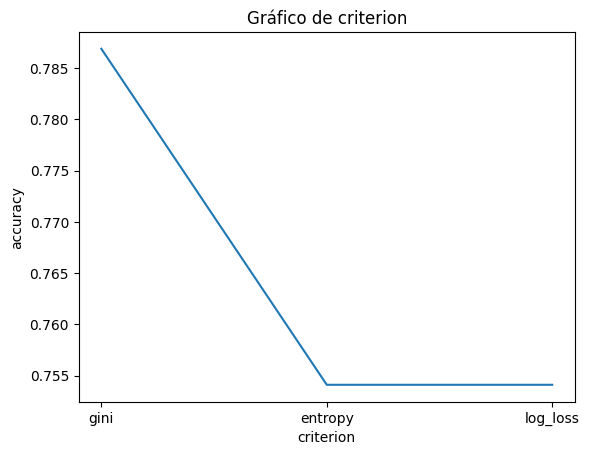

In [79]:
est_DecisionTreeClassifier = DecisionTreeClassifier(max_depth=150, max_leaf_nodes=10, criterion="gini", random_state=21)
est_DecisionTreeClassifier.fit(X_train,y_train)
accuracy_DecisionTreeClassifier_1 = accuracy_score(est_DecisionTreeClassifier.predict(X_test), y_test)

est_DecisionTreeClassifier = DecisionTreeClassifier(max_depth=150, max_leaf_nodes=10, criterion="entropy", random_state=21)
est_DecisionTreeClassifier.fit(X_train,y_train)
accuracy_DecisionTreeClassifier_2 = accuracy_score(est_DecisionTreeClassifier.predict(X_test), y_test)

est_DecisionTreeClassifier = DecisionTreeClassifier(max_depth=150, max_leaf_nodes=10 ,criterion="log_loss", random_state=21)
est_DecisionTreeClassifier.fit(X_train,y_train)
accuracy_DecisionTreeClassifier_3 = accuracy_score(est_DecisionTreeClassifier.predict(X_test), y_test)


x = ["gini", "entropy", "log_loss"]
y1 = [accuracy_DecisionTreeClassifier_1, accuracy_DecisionTreeClassifier_2, accuracy_DecisionTreeClassifier_3 ]

plt.plot(x, y1)
plt.xlabel('criterion')
plt.ylabel('accuracy')
plt.title('Gráfico de criterion')
plt.show()

En este caso observamos una mejor precisión con el valor "gini" del parametro criterion, el cual es el valor que viene por default.

In [80]:
est_DecisionTreeClassifier = DecisionTreeClassifier(max_depth=200, max_leaf_nodes=10, random_state=21)
est_DecisionTreeClassifier.fit(X_train,y_train)
best_DecisionTreeClassifier=accuracy_score(est_DecisionTreeClassifier.predict(X_test), y_test)
print(best_DecisionTreeClassifier)


0.7868852459016393


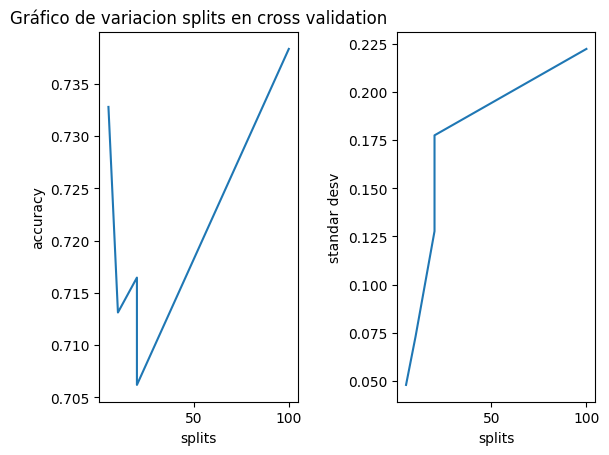

accuracy 0.733 (+/- 0.04794)


In [81]:
#@title Cross validation with tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris


s1 = cross_val_score(est_DecisionTreeClassifier, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
s2 = cross_val_score(est_DecisionTreeClassifier, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
s3 = cross_val_score(est_DecisionTreeClassifier, X, y, cv=KFold(20, shuffle=True), scoring=make_scorer(accuracy_score))
s4 = cross_val_score(est_DecisionTreeClassifier, X, y, cv=KFold(50, shuffle=True), scoring=make_scorer(accuracy_score))
s5 = cross_val_score(est_DecisionTreeClassifier, X, y, cv=KFold(100, shuffle=True), scoring=make_scorer(accuracy_score))

x = [5, 10, 20, 20, 100]
y1 = [np.mean(s1), np.mean(s2), np.mean(s3),np.mean(s4),np.mean(s5) ]

y2=[np.std(s1),np.std(s2),np.std(s3),np.std(s4),np.std(s5)]

fig, axs = plt.subplots(1, 2)

axs[0].plot(x, y1)
axs[0].set_xlabel('splits')
axs[0].set_ylabel('accuracy')
axs[0].set_title('Gráfico de variacion splits en cross validation')

axs[1].plot(x, y2)
axs[1].set_xlabel('splits')
axs[1].set_ylabel('standar desv')

plt.subplots_adjust(wspace=0.5)

plt.show()

print("accuracy %.3f (+/- %.5f)"%(np.mean(s1), np.std(s1)))


Se observa que para el estimador cross validation con tree decission el split con mejor acuraccy es 5

In [82]:
best_CrossDecisionTreeClassifier = np.mean(cross_val_score(est_DecisionTreeClassifier, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score)))

print(best_CrossDecisionTreeClassifier)

0.7229508196721313


##Tuning de parametros para Random Forest Classifier


*   **Metodo Random Forest Classifier**



In [83]:
from sklearn.ensemble import RandomForestClassifier
est_RandomForestClassifier = RandomForestClassifier(random_state=21)
est_RandomForestClassifier.fit(X_train,y_train)
print(accuracy_score(est_RandomForestClassifier.predict(X_test), y_test))

0.8032786885245902


**Tuning de parametros Random Forest Classifier**


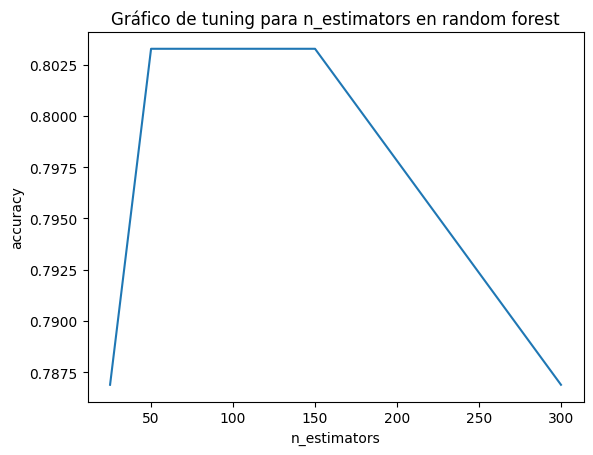

In [84]:
est_RandomForestClassifier = RandomForestClassifier(n_estimators=25, random_state=21)
est_RandomForestClassifier.fit(X_train,y_train)
accuracy_RandomForestClassifier_1=accuracy_score(est_RandomForestClassifier.predict(X_test), y_test)

est_RandomForestClassifier = RandomForestClassifier(n_estimators=50, random_state=21)
est_RandomForestClassifier.fit(X_train,y_train)
accuracy_RandomForestClassifier_2=accuracy_score(est_RandomForestClassifier.predict(X_test), y_test)

est_RandomForestClassifier = RandomForestClassifier(n_estimators=100, random_state=21)
est_RandomForestClassifier.fit(X_train,y_train)
accuracy_RandomForestClassifier_3=accuracy_score(est_RandomForestClassifier.predict(X_test), y_test)

est_RandomForestClassifier = RandomForestClassifier(n_estimators=150, random_state=21)
est_RandomForestClassifier.fit(X_train,y_train)
accuracy_RandomForestClassifier_4=accuracy_score(est_RandomForestClassifier.predict(X_test), y_test)

est_RandomForestClassifier = RandomForestClassifier(n_estimators=300, random_state=21)
est_RandomForestClassifier.fit(X_train,y_train)
accuracy_RandomForestClassifier_5=accuracy_score(est_RandomForestClassifier.predict(X_test), y_test)


x = [25, 50, 100, 150, 300]
y1 = [accuracy_RandomForestClassifier_1, accuracy_RandomForestClassifier_2, accuracy_RandomForestClassifier_3,accuracy_RandomForestClassifier_4,accuracy_RandomForestClassifier_5 ]

plt.plot(x, y1)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('Gráfico de tuning para n_estimators en random forest')
plt.show()


Se observa un comportamiento lineal entre 50 y 150 n_stimators, por lo tanto se tomara un valor intermedio. En este caso 100.

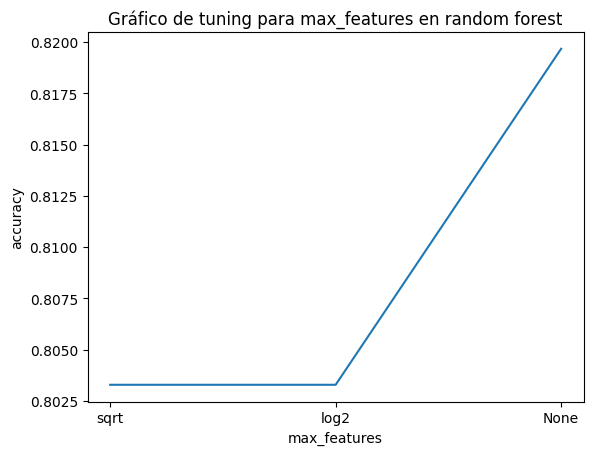

In [85]:
est_RandomForestClassifier = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=21)
est_RandomForestClassifier.fit(X_train,y_train)
accuracy_RandomForestClassifier_1=accuracy_score(est_RandomForestClassifier.predict(X_test), y_test)

est_RandomForestClassifier = RandomForestClassifier(n_estimators=100, max_features= 'log2', random_state=21)
est_RandomForestClassifier.fit(X_train,y_train)
accuracy_RandomForestClassifier_2=accuracy_score(est_RandomForestClassifier.predict(X_test), y_test)

est_RandomForestClassifier = RandomForestClassifier(n_estimators=100, max_features= None, random_state=21)
est_RandomForestClassifier.fit(X_train,y_train)
accuracy_RandomForestClassifier_3=accuracy_score(est_RandomForestClassifier.predict(X_test), y_test)

x = ['sqrt', 'log2', 'None']
y1 = [accuracy_RandomForestClassifier_1, accuracy_RandomForestClassifier_2, accuracy_RandomForestClassifier_3 ]

plt.plot(x, y1)
plt.xlabel('max_features')
plt.ylabel('accuracy')
plt.title('Gráfico de tuning para max_features en random forest')
plt.show()

Para este hyperparametro se presenta el mejor accuracy con el valor 'None'

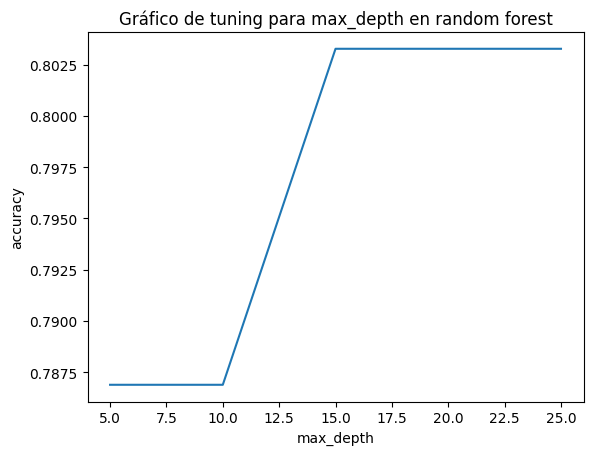

In [86]:
est_RandomForestClassifier = RandomForestClassifier(n_estimators=50, max_depth = 5,max_features= None, random_state=21)
est_RandomForestClassifier.fit(X_train,y_train)
accuracy_RandomForestClassifier_1=accuracy_score(est_RandomForestClassifier.predict(X_test), y_test)

est_RandomForestClassifier = RandomForestClassifier(n_estimators=50, max_depth = 10,max_features= None, random_state=21)
est_RandomForestClassifier.fit(X_train,y_train)
accuracy_RandomForestClassifier_2=accuracy_score(est_RandomForestClassifier.predict(X_test), y_test)

est_RandomForestClassifier = RandomForestClassifier(n_estimators=50, max_depth = 15,max_features= None, random_state=21)
est_RandomForestClassifier.fit(X_train,y_train)
accuracy_RandomForestClassifier_3=accuracy_score(est_RandomForestClassifier.predict(X_test), y_test)

est_RandomForestClassifier = RandomForestClassifier(n_estimators=50, max_depth = 20, max_features= None,random_state=21)
est_RandomForestClassifier.fit(X_train,y_train)
accuracy_RandomForestClassifier_4=accuracy_score(est_RandomForestClassifier.predict(X_test), y_test)

est_RandomForestClassifier = RandomForestClassifier(n_estimators=50, max_depth = 25,max_features= None, random_state=21)
est_RandomForestClassifier.fit(X_train,y_train)
accuracy_RandomForestClassifier_5=accuracy_score(est_RandomForestClassifier.predict(X_test), y_test)


x = [5, 10, 15, 20, 25]
y1 = [accuracy_RandomForestClassifier_1, accuracy_RandomForestClassifier_2, accuracy_RandomForestClassifier_3,accuracy_RandomForestClassifier_4,accuracy_RandomForestClassifier_5 ]


plt.plot(x, y1)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Gráfico de tuning para max_depth en random forest')
plt.show()


Se observa un comportamiento lineal para max depth entre 15 y 25, por lo tanto se tomara un valor intermedio, en este caso 20.

In [87]:
est_RandomForestClassifier = RandomForestClassifier(n_estimators=100, max_depth = 20, max_features= None,)
est_RandomForestClassifier.fit(X_train,y_train)
best_accuracy_RandomForestClassifier=accuracy_score(est_RandomForestClassifier.predict(X_test), y_test)
print(best_accuracy_RandomForestClassifier)

0.7868852459016393


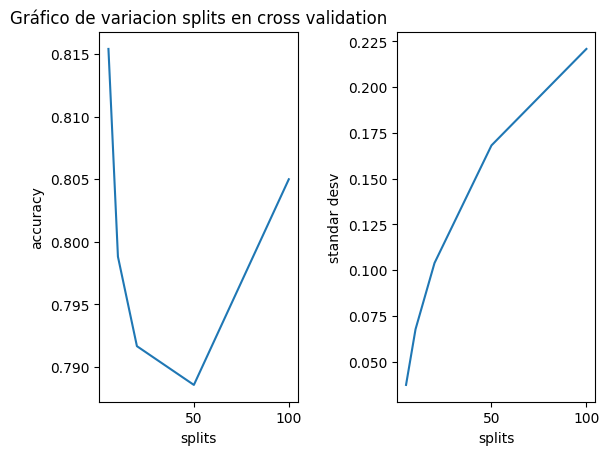

In [88]:
#@title Cross validation with tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

est = RandomForestClassifier(n_estimators=100, max_depth = 20, random_state=21)

s1 = cross_val_score(est, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
s2 = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
s3 = cross_val_score(est, X, y, cv=KFold(20, shuffle=True), scoring=make_scorer(accuracy_score))
s4 = cross_val_score(est, X, y, cv=KFold(50, shuffle=True), scoring=make_scorer(accuracy_score))
s5 = cross_val_score(est, X, y, cv=KFold(100, shuffle=True), scoring=make_scorer(accuracy_score))



x = [5, 10, 20, 50, 100]
y1 = [np.mean(s1), np.mean(s2), np.mean(s3),np.mean(s4),np.mean(s5) ]

y2=[np.std(s1),np.std(s2),np.std(s3),np.std(s4),np.std(s5)]

fig, axs = plt.subplots(1, 2)

axs[0].plot(x, y1)
axs[0].set_xlabel('splits')
axs[0].set_ylabel('accuracy')
axs[0].set_title('Gráfico de variacion splits en cross validation')

axs[1].plot(x, y2)
axs[1].set_xlabel('splits')
axs[1].set_ylabel('standar desv')

plt.subplots_adjust(wspace=0.5)

plt.show()


El mejor resultado de cross validation con random forest se obtiene al indicar 50 splits.

In [ ]:
best_CrossRandomForestClassifier = np.mean(cross_val_score(est, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score)))
print(best_CrossRandomForestClassifier)

##Tuning de parametros para SVM

*   **Metodo Support vector machine (SVM)**


In [90]:
from sklearn.svm import SVC
est = SVC(random_state=21)
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.6885245901639344


**Tuning de parametros  Support vector machine (SVM)**


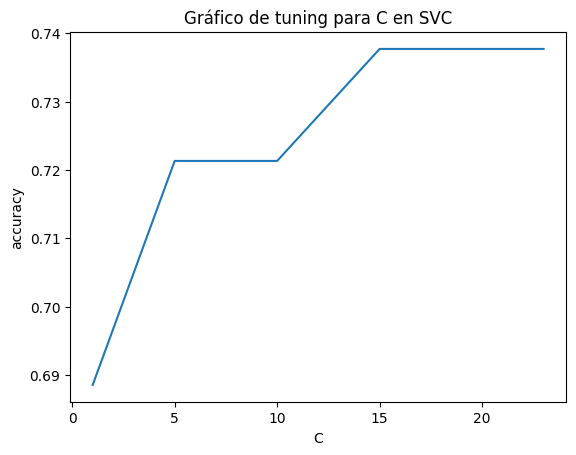

In [91]:
est = SVC(C=1, random_state=21)
est.fit(X_train,y_train)
accuracy_SVC_1=accuracy_score(est.predict(X_test), y_test)

est = SVC(C=5, random_state=21)
est.fit(X_train,y_train)
accuracy_SVC_2=accuracy_score(est.predict(X_test), y_test)

est = SVC(C=10, random_state=21)
est.fit(X_train,y_train)
accuracy_SVC_3=accuracy_score(est.predict(X_test), y_test)

est = SVC(C=15, random_state=21)
est.fit(X_train,y_train)
accuracy_SVC_4=accuracy_score(est.predict(X_test), y_test)

est = SVC(C=23, random_state=21)
est.fit(X_train,y_train)
accuracy_SVC_5=accuracy_score(est.predict(X_test), y_test)


x = [1, 5, 10, 15, 23]
y1 = [accuracy_SVC_1, accuracy_SVC_2, accuracy_SVC_3,accuracy_SVC_4,accuracy_SVC_5 ]

plt.plot(x, y1)
plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('Gráfico de tuning para C en SVC')
plt.show()



Se la mejor precisión para valores cercanos a 20 de C, en este caso, 23.

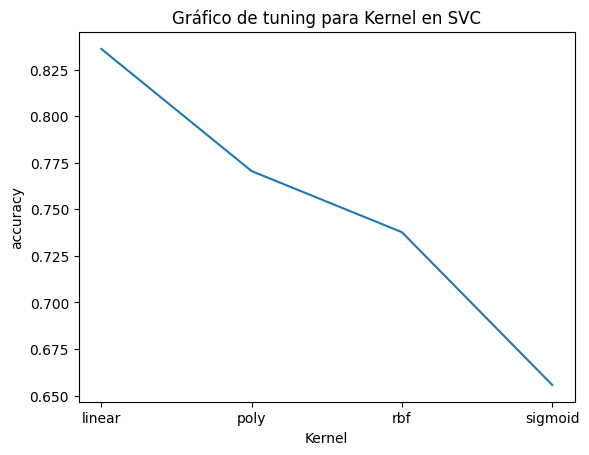

In [92]:
est = SVC(C=23, kernel = 'linear', random_state=21)
est.fit(X_train,y_train)
accuracy_SVC_1=accuracy_score(est.predict(X_test), y_test)

est = SVC(C=23, kernel= 'poly', random_state=21)
est.fit(X_train,y_train)
accuracy_SVC_2=accuracy_score(est.predict(X_test), y_test)

est = SVC(C=23, kernel = 'rbf', random_state=21)
est.fit(X_train,y_train)
accuracy_SVC_3=accuracy_score(est.predict(X_test), y_test)

est = SVC(C=23, kernel='sigmoid', random_state=21)
est.fit(X_train,y_train)
accuracy_SVC_4=accuracy_score(est.predict(X_test), y_test)


x = ['linear', 'poly', 'rbf', 'sigmoid']
y1 = [accuracy_SVC_1, accuracy_SVC_2, accuracy_SVC_3,accuracy_SVC_4 ]

plt.plot(x, y1)
plt.xlabel('Kernel')
plt.ylabel('accuracy')
plt.title('Gráfico de tuning para Kernel en SVC')
plt.show()



Al variar el valor de kernel se evidencia el mejor valor de precisión en el tipo lineal, sin embargo se probaran valores de grado en poly para intentar obtener una mejor precisión.

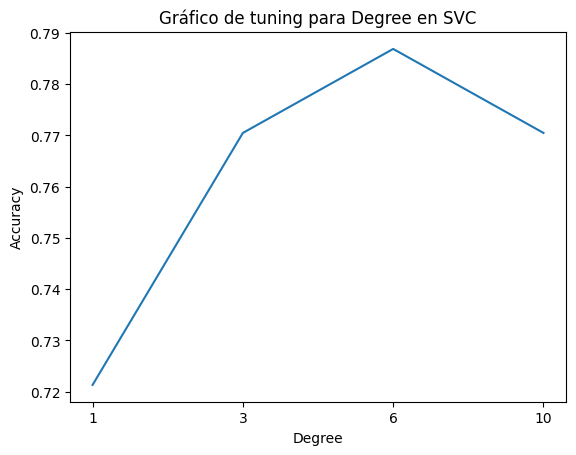

In [93]:
est = SVC(C=23, kernel = 'poly', degree=1, random_state=21)
est.fit(X_train,y_train)
accuracy_SVC_1=accuracy_score(est.predict(X_test), y_test)

est = SVC(C=23, kernel= 'poly', degree=3, random_state=21)
est.fit(X_train,y_train)
accuracy_SVC_2=accuracy_score(est.predict(X_test), y_test)

est = SVC(C=23, kernel = 'poly', degree=6, random_state=21)
est.fit(X_train,y_train)
accuracy_SVC_3=accuracy_score(est.predict(X_test), y_test)

est = SVC(C=23, kernel='poly', degree=10, random_state=21)
est.fit(X_train,y_train)
accuracy_SVC_4=accuracy_score(est.predict(X_test), y_test)


x = ['1', '3', '6', '10']
y1 = [accuracy_SVC_1, accuracy_SVC_2, accuracy_SVC_3,accuracy_SVC_4 ]

plt.plot(x, y1)
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.title('Gráfico de tuning para Degree en SVC')
plt.show()



No se logró obtener un mejor valor que en el kernel lineal, por lo cual se utilizará ese para obtener la mejor precisión posible.

In [94]:
est = SVC(C=23, kernel = 'linear', random_state=21)
est.fit(X_train,y_train)
best_SVCClassifier=np.mean(accuracy_score(est.predict(X_test), y_test))
print(best_SVCClassifier)

0.8360655737704918


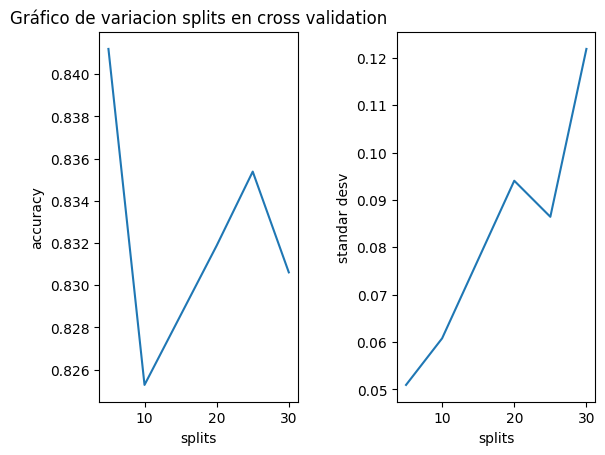

In [95]:
#@title Cross validation with tuning
from sklearn.model_selection import cross_val_score

est = SVC(C=23, kernel = 'linear', random_state=21)

s1 = cross_val_score(est, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
s2 = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
s3 = cross_val_score(est, X, y, cv=KFold(20, shuffle=True), scoring=make_scorer(accuracy_score))
s4 = cross_val_score(est, X, y, cv=KFold(25, shuffle=True), scoring=make_scorer(accuracy_score))
s5 = cross_val_score(est, X, y, cv=KFold(30, shuffle=True), scoring=make_scorer(accuracy_score))



x = [5, 10, 20, 25, 30]
y1 = [np.mean(s1), np.mean(s2), np.mean(s3),np.mean(s4),np.mean(s5) ]

y2=[np.std(s1),np.std(s2),np.std(s3),np.std(s4),np.std(s5)]

fig, axs = plt.subplots(1, 2)

axs[0].plot(x, y1)
axs[0].set_xlabel('splits')
axs[0].set_ylabel('accuracy')
axs[0].set_title('Gráfico de variacion splits en cross validation')

axs[1].plot(x, y2)
axs[1].set_xlabel('splits')
axs[1].set_ylabel('standar desv')

plt.subplots_adjust(wspace=0.5)

plt.show()

Nota: Este metodo toma mucho tiempo. (8minutos)

Se observa mejor rendimiento en precisión para un numero alto de splits (30) y tambien se observa un crecimiento de la desviacion estandar

In [97]:
best_CrossSVCClassifier = np.mean(cross_val_score(est, X, y, cv=KFold(25, shuffle=True), scoring=make_scorer(accuracy_score)))
print(best_CrossSVCClassifier)

0.831794871794872


Se observa que para el estimador cross validation con tree decission el split con mejor accuracy es con 50.

#Resultados

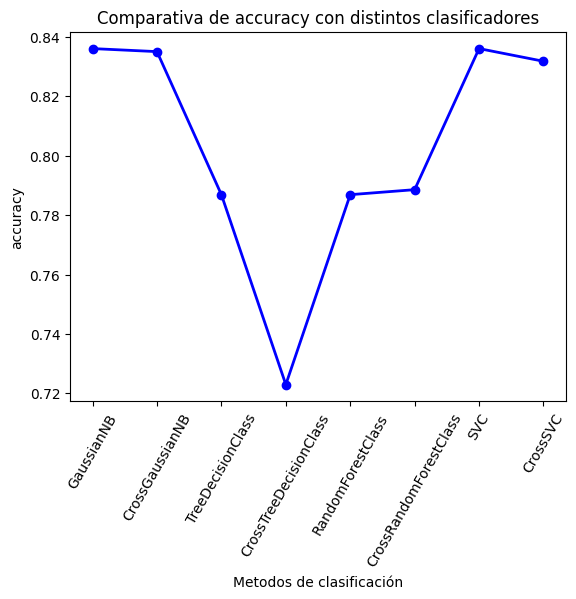

GaussianNB 0.8360655737704918
CrossGaussianNB 0.8350438596491229
TreeDecisionClass 0.7868852459016393
CrossTreeDecisionClass 0.7229508196721313
RandomForestClass 0.7868852459016393
CrossRandomForestClass 0.7885714285714286
SVC 0.8360655737704918
CrossSVC 0.831794871794872


In [98]:

x = ["GaussianNB","CrossGaussianNB", "TreeDecisionClass", "CrossTreeDecisionClass",
     "RandomForestClass", "CrossRandomForestClass", "SVC", "CrossSVC"]
y1 = [accuracy_GaussianNB, CrossGaussianNB, best_DecisionTreeClassifier, best_CrossDecisionTreeClassifier,
      best_accuracy_RandomForestClassifier, best_CrossRandomForestClassifier, best_SVCClassifier, best_CrossSVCClassifier]

plt.plot(x, y1, marker='o', linestyle='-', color='blue', linewidth=2)
plt.xlabel('Metodos de clasificación')
plt.ylabel('accuracy')
plt.title('Comparativa de accuracy con distintos clasificadores')
plt.xticks(x)
plt.tick_params(axis='x', rotation=60)


plt.show()

# Combinar los dos vectores utilizando zip
combined = zip(x, y1)

# Iterar sobre los elementos combinados e imprimir el primero de cada uno
for x_element, y1_element in combined:
    print(x_element, y1_element)


In [99]:
#@title Aprendizaje no supervisado.

datasetClassification = pd.read_csv('/content/heart.csv', delimiter=',')
dataset = datasetClassification
data_rows, data_cols = dataset.shape
print(f'There are {data_rows} rows and {data_cols} columns')
dataset.head(10)
dataset.info()

There are 303 rows and 14 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


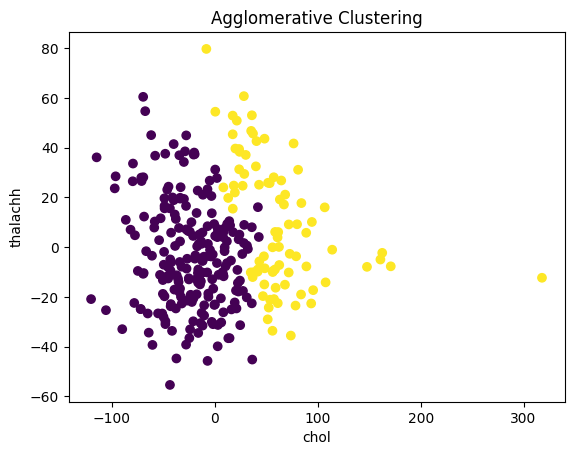

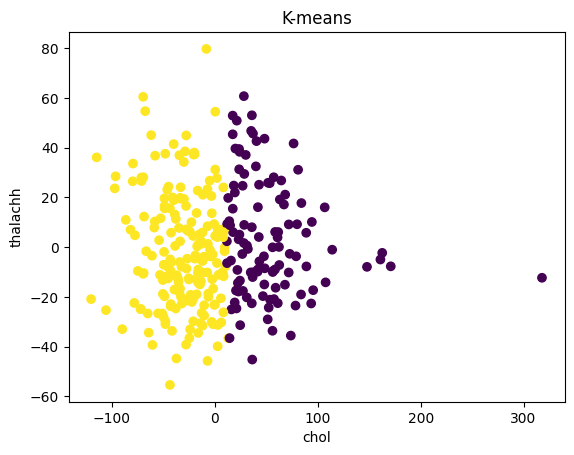

Agglomerative Clustering - accuracy_score:
0.39933993399339934
K-means - accuracy_score:
0.5742574257425742


In [100]:
from sklearn.metrics import *

import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA

data = dataset

# Seleccion de columnas
selected_columns = ['age', 'sex', 'chol', 'thalachh']
X = data[selected_columns]
Y = data['output']

# Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=2)
agglomerative_labels = agglomerative.fit_predict(X)

# K-means
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(X)

# Reducir la dimensionalidad para visualizar los resultados en 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

componentes_principales = pca.components_
column_labels = selected_columns

best_component_index = None
best_component_variance = 0.0
for i, componente in enumerate(componentes_principales):
    varianza = pca.explained_variance_ratio_[i]
    if varianza > best_component_variance:
        best_component_variance = varianza
        best_component_index = i

# Obtener el mejor componente principal
best_component = componentes_principales[best_component_index]
best_component_label = column_labels[best_component.argmax()]

# Graficar los resultados de Agglomerative Clustering
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglomerative_labels, cmap='viridis')
plt.xlabel(f'{best_component_label}')
plt.ylabel(f'{column_labels[(best_component.argmax()+1) % len(column_labels)]}')
plt.title('Agglomerative Clustering')
plt.show()

# Graficar los resultados de K-means
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.xlabel(f'{best_component_label}')
plt.ylabel(f'{column_labels[(best_component.argmax()+1) % len(column_labels)]}')
plt.title('K-means')
plt.show()

# Comparar los resultados
print('Agglomerative Clustering - accuracy_score:')
print(accuracy_score(agglomerative_labels, Y))
print('K-means - accuracy_score:')
print(accuracy_score(kmeans_labels, Y))
